In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
# Upload the Kaggle API credentials JSON file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gibranandradecuadra","key":"acff89c95f386cc823309caea65f4374"}'}

In [3]:
#do not run twice!!
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d darren2020/ct-to-mri-cgan

100% 185M/185M [00:02<00:00, 97.5MB/s]
100% 185M/185M [00:02<00:00, 90.2MB/s]


In [5]:
! unzip ct-to-mri-cgan.zip -d ct-to-mri-cgan

Streaming output truncated to the last 5000 lines.
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1018.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1019.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1020.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1028.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1029.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1030.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1038.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1039.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1040.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1048.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1049.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1050.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1058.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1059.png  
  inflating: ct-to-mri-cgan/Dataset/images/testA/ct1060.png  
  inflating: ct-to-

In [7]:
import pandas as pd
import numpy as np
import cv2
import os
#define the cat and dog folder
CT_folder='/content/ct-to-mri-cgan/Dataset/images/testA'
MRI_folder='/content/ct-to-mri-cgan/Dataset/images/testB'
#initialize lists to store images and labels
images=[]
labels=[]
#load and preprocess cat images
for filename in os.listdir(CT_folder):
  if filename.endswith('.jpg'):
    img=cv2.imread(os.path.join(CT_folder,filename))
    img=cv2.resize(img,(128,128)) #resize the images
    images.append(img)
    labels.append(0) # 0 represents cats!
#load and preprocess dog images
for filename in os.listdir(MRI_folder):
  if filename.endswith('.jpg'):
    img=cv2.imread(os.path.join(MRI_folder,filename))
    img=cv2.resize(img,(128,128))
    images.append(img)
    labels.append(1) # 1 represents dogs!
#conver lists to Numpy arrays!
images=np.array(images)
labels=np.array(labels)

In [8]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [9]:
#KERAS MODEL
from operator import mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
#train the model
history = model.fit(x_train , y_train , epochs=10 , batch_size=32 , validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 13s 771ms/step - loss: 0.9156 - accuracy: 0.9433 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 12s 788ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 14s 922ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 12s 789ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 11s 764ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 11s 767ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 11s 735ms/step - loss: 0.0000e+00 - accuracy: 

In [12]:
#evaluating the model
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy= {test_acc}')

5/5 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 749ms/epoch - 150ms/step
Test accuracy= 1.0


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
#Example: predicting on a single image
sample_image=x_test[6] #replace with your image data!
predictions=model.predict(np.expand_dims(sample_image,axis=0))
predicted_lable=np.argmax(predictions)

#you can interpret the lable with yousing your dataset's class lables (0 for cats ,1 for dogs)
class_lables=['CT','MRI']
predicted_class=class_lables[predicted_lable]
print(f'predicted_class: {predicted_class}')

1/1 [==============================] - 0s 26ms/step
predicted_class: MRI


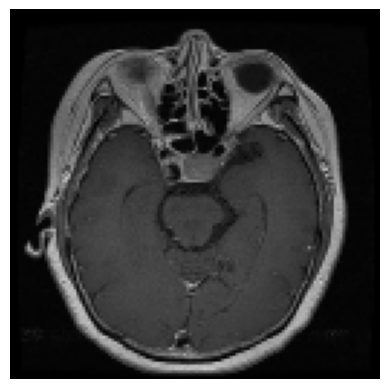

In [ ]:
import matplotlib.pyplot as plt
#Display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
#test from out of our dataset
uploaded=files.upload()

Saving pexels-mart-production-7089020.jpg to pexels-mart-production-7089020.jpg


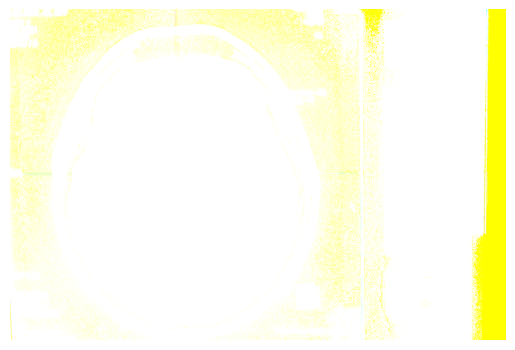

In [ ]:
img_bgr = cv2.imread('/content/pexels-mart-production-7089020.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb.astype(float))
plt.axis('off')
plt.show()


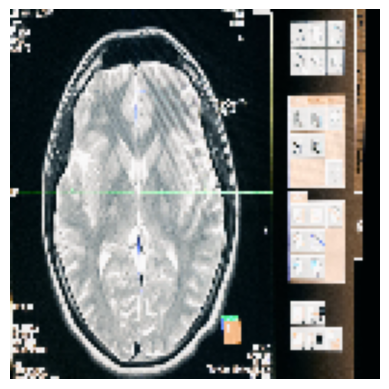

In [ ]:
uploaded_image=cv2.resize(img_bgr,(128,128))
#uploaded_image=cv2.cvtColor(uploaded_image,cv2.COLOR_BGR2RGB)
plt.imshow(uploaded_image)
plt.axis('off')
plt.show()

In [ ]:
#comparing both libraries
img_mpl = plt.imread(trainA_files[20])
img_cv2 = cv2.imread(trainA_files[20])
img_mpl.shape, img_cv2.shape

In [ ]:
uploaded_image=uploaded_image.astype('float32') / 255.0
uploaded_image=np.expand_dims(uploaded_image,axis=0)
predictions=model.predict(uploaded_image)
predicted_lable=np.argmax(predictions)

1/1 [==============================] - 0s 116ms/step


In [ ]:
class_lables=['CT','MRI']
predicted_class=class_lables[predicted_lable]
print(f'predicted_class: {predicted_class}')

predicted_class: MRI


In [ ]:
#PYTORCH

In [ ]:
img_mpl

In [ ]:
img_mpl.max()

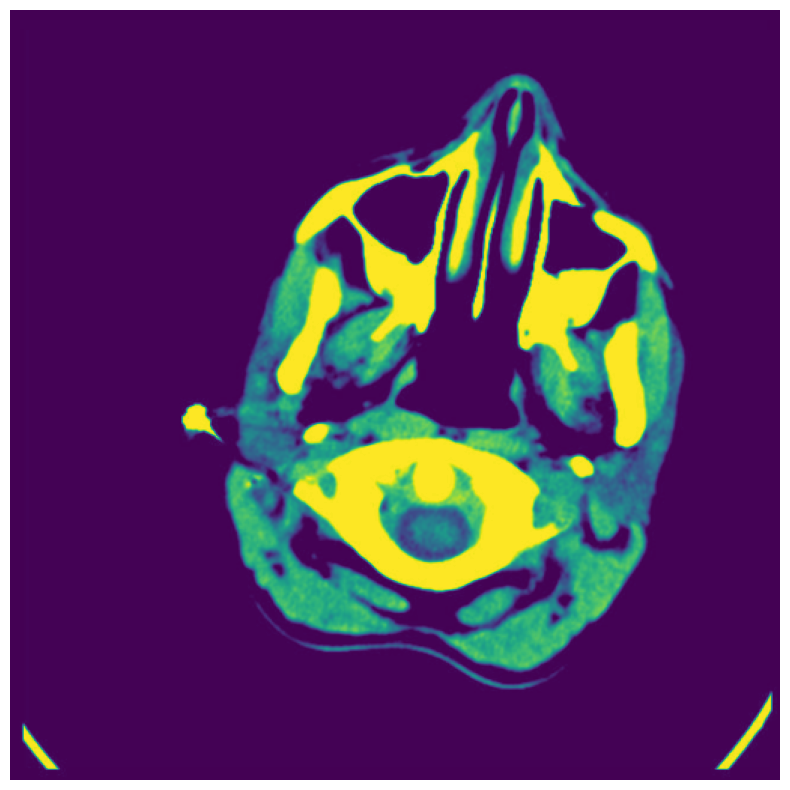

In [ ]:
fig,ax = plt.subplots(figsize = (10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()